# Data Analysis Assignment: Transactional Data

This assignment is designed to test your proficiency with Python's core data science libraries: Pandas, NumPy, Matplotlib, and Seaborn. You will be working with a  dataset containing information about various transactions. The goal is to clean, analyze, and visualize the data to uncover meaningful patterns.

## The Dataset

You should use the `frozen_confections_data.csv` file provided with this assignment. It contains the following columns:

- `TransactionID`
- `SuccessfulOrder`
- `FlavorCategory`
- `CustomerGender`
- `CustomerAge`
- `ToppingsCount`
- `ScoopsCount`
- `TotalCost`
- `PaymentMethod`
- `CustomerName`

## Part 1: Data Loading and Initial Inspection (Pandas)

**Objective:** Load the dataset and perform basic checks to understand its structure and content.

1.  Load the `frozen_confections_data.csv` file into a Pandas DataFrame.
    * **Step:** Use `pd.read_csv()`.
2.  Display the first 5 rows of the DataFrame.
    * **Step:** Use the `.head()` method.
3.  Get a concise summary of the DataFrame, including the data types of each column and the number of non-null values.
    * **Step:** Use the `.info()` method.
4.  Display the columns and their respective data types.
    * **Step:** Use the `.dtypes` attribute.
5.  Check the dimensions (number of rows and columns) of the DataFrame.
    * **Step:** Use the `.shape` attribute.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#1.Load the frozen_confections_data.csv file into a Pandas DataFrame
print("Load the frozen_confections_data.csv file into a Pandas DataFrame")
df=pd.read_csv("frozen_confections_data.csv")

#2.Display the first 5 rows of the DataFrame
print("Display the first 5 rows of the DataFrame:")
print(df.head())

#3.Get a concise summary of the DataFrame, including the data types of each column and the number of non-null values
print("Get a concise summary of the DataFrame, including the data types of each column and the number of non-null values:")
print(df.info())

#4.Display the columns and their respective data types
print("Display the columns and their respective data types:")
print(df.dtypes)

#5.Check the dimensions (number of rows and columns) of the DataFrame
print("Check the dimensions (number of rows and columns) of the DataFrame:")
print(df.shape)

Load the frozen_confections_data.csv file into a Pandas DataFrame
Display the first 5 rows of the DataFrame:
   TransactionID  SuccessfulOrder  FlavorCategory CustomerGender  CustomerAge  \
0              1                0               1         Female           18   
1              2                0               2         Female           30   
2              3                0               3           Male           11   
3              4                0               2         Female           50   
4              5                0               1         Female           45   

   ToppingsCount  ScoopsCount   TotalCost PaymentMethod   CustomerName  
0              0            3  127.308107           UPI      Rahul Ali  
1              1            3  262.398611           UPI   Aarav Sastry  
2              1            2  185.253343          Card     Isha Joshi  
3              0            1  117.674431           UPI  Vivaan Pillai  
4              2            1  107.0316

## Part 2: Data Cleaning and Manipulation (Pandas)

**Objective:** Clean the data and prepare it for analysis.

6.  Calculate the number of missing values in each column.
    * **Step:** Use `.isnull()` followed by `.sum()`.
7.  Check if there are any duplicate rows in the DataFrame.
    * **Step:** Use `.duplicated()` and `.sum()`.
8.  Rename the `SuccessfulOrder` column to `OrderSuccess`.
    * **Step:** Use the `.rename()` method with the `columns` parameter.
9.  Create a new column named `ItemsCount` which is the sum of `ToppingsCount` and `ScoopsCount`.
    * **Step:** Add the two columns together.
10. Calculate the average `TotalCost` for each `PaymentMethod`.
    * **Step:** Use the `.groupby()` method on `PaymentMethod` and then apply `.mean()` to `TotalCost`.

In [19]:
#6.Calculate the number of missing values in each column
print("Calculate the number of missing values in each column:")
print(df.isnull().sum())
print("*"*20)
#7.Check if there are any duplicate rows in the DataFrame
print("Check if there are any duplicate rows in the DataFrame:")
print(df.duplicated().sum())
print("*"*20)
#8.Rename the SuccessfulOrder column to OrderSuccess
renamed_df=df.rename(columns={"SuccessfulOrder":"OrderSuccess"})
print("Rename the SuccessfulOrder column to OrderSuccess:")
print(renamed_df.head())
print("*"*20)
#9.Create a new column named ItemsCount which is the sum of ToppingsCount and ScoopsCount
print("Create a new column named ItemsCount which is the sum of ToppingsCount and ScoopsCount:")
renamed_df["ItemCount"]=renamed_df["ToppingsCount"]+renamed_df["ScoopsCount"]
print(renamed_df.head())
print("*"*20)
#10.Calculate the average TotalCost for each PaymentMethod
print("Calculate the average TotalCost for each PaymentMethod")
grouped_df=df.groupby("PaymentMethod")["TotalCost"].mean()
print(grouped_df)

Calculate the number of missing values in each column:
TransactionID      0
SuccessfulOrder    0
FlavorCategory     0
CustomerGender     0
CustomerAge        0
ToppingsCount      0
ScoopsCount        0
TotalCost          0
PaymentMethod      0
CustomerName       0
dtype: int64
********************
Check if there are any duplicate rows in the DataFrame:
0
********************
Rename the SuccessfulOrder column to OrderSuccess:
   TransactionID  OrderSuccess  FlavorCategory CustomerGender  CustomerAge  \
0              1             0               1         Female           18   
1              2             0               2         Female           30   
2              3             0               3           Male           11   
3              4             0               2         Female           50   
4              5             0               1         Female           45   

   ToppingsCount  ScoopsCount   TotalCost PaymentMethod   CustomerName  
0              0            3

## Part 3: Basic Exploratory Data Analysis (EDA) and NumPy

**Objective:** Use descriptive statistics and NumPy to gain initial insights.

11. Calculate the mean, median, and standard deviation of `CustomerAge`.
    * **Step:** Use `.mean()`, `.median()`, and `.std()` on the `CustomerAge` column.
12. Find the most common `PaymentMethod` and `FlavorCategory`.
    * **Step:** Use the `.mode()` method.
13. Count the number of successful and unsuccessful orders.
    * **Step:** Use the `.value_counts()` method on the `OrderSuccess` column.
14. Use NumPy to calculate the percentage of successful orders.
    * **Step:** Calculate the sum of successful orders and divide by the total number of records.
15. Find the maximum `TotalCost` and the minimum `TotalCost` from the dataset.
    * **Step:** Use `.max()` and `.min()` on the `TotalCost` column.


In [20]:
#11.Calculate the mean, median, and standard deviation of CustomerAge
print("Calculate the mean, median, and standard deviation of CustomerAge:")
print(f"mean:{np.mean(df["CustomerAge"])}")
print(f"median:{np.median(df["CustomerAge"])}")
print(f"standard deviation:{np.std(df["CustomerAge"])}")
print("~"*60)
#12.Find the most common PaymentMethod and FlavorCategory.
mode_of_paymentmethod=df["PaymentMethod"].mode()
print("the most common PaymentMethod:",mode_of_paymentmethod)
print("~"*60)
mode_of_flavorcategory=df["FlavorCategory"].mode()
print("the most common FlavorCategory:",mode_of_flavorcategory)
print("~"*60)
#13.Count the number of successful and unsuccessful orders.
success=df["SuccessfulOrder"].value_counts()
print("Count the number of successful orders:",success)
print("~"*60)
#14.Use NumPy to calculate the percentage of successful orders.
successful_orders=df["SuccessfulOrder"].sum()
total_orders=len(df["SuccessfulOrder"])
print("the length of dataframe is:",total_orders)
percentage=(successful_orders/total_orders)*100
print("the percentage of successful orders:",percentage)
#15.Find the maximum TotalCost and the minimum TotalCost from the dataset
print("the maximum TotalCost:",np.max(df["TotalCost"]))
print("the minimum TotalCost:",np.min(df["TotalCost"]))

Calculate the mean, median, and standard deviation of CustomerAge:
mean:24.6602
median:25.0
standard deviation:9.714604261625913
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
the most common PaymentMethod: 0    UPI
Name: PaymentMethod, dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
the most common FlavorCategory: 0    1
Name: FlavorCategory, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Count the number of successful orders: SuccessfulOrder
0    5000
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
the length of dataframe is: 5000
the percentage of successful orders: 0.0
the maximum TotalCost: 334.8678009032224
the minimum TotalCost: 75.11476249267018


## Part 4: Data Visualization (Matplotlib & Seaborn)

**Objective:** Create informative plots to visually represent key relationships in the data.

16. Create a histogram of the `CustomerAge` distribution.
    * **Step:** Use `plt.hist()` from Matplotlib.
17. Visualize the count of orders by `PaymentMethod` using a bar plot.
    * **Step:** Use `sns.countplot()` from Seaborn.
18. Create a countplot to show the number of successful orders (`OrderSuccess`) for each `FlavorCategory`.
    * **Step:** Use `sns.countplot()` and set the `hue` parameter to `OrderSuccess`.
19. Create a box plot to show the distribution of `TotalCost` across different `FlavorCategory`s.
    * **Step:** Use `sns.boxplot()`.
20. Create a violin plot to show the distribution of `CustomerAge` for successful versus unsuccessful orders.
    * **Step:** Use `sns.violinplot()`.
21. Generate a scatter plot showing the relationship between `ToppingsCount` and `TotalCost`.
    * **Step:** Use `plt.scatter()` or `sns.scatterplot()`.
22. Create a bar chart showing the average `TotalCost` per `PaymentMethod`.
    * **Step:** Group the data by `PaymentMethod`, calculate the mean `TotalCost`, and then use `sns.barplot()`.
23. Visualize the correlation matrix of the numerical columns using a heatmap.
    * **Step:** Calculate the correlation matrix using `.corr()` and then use `sns.heatmap()`.
24. Create a pie chart to show the proportion of each `FlavorCategory`.
    * **Step:** Use `plt.pie()` after getting the value counts for `FlavorCategory`.
25. Use a pair plot to visualize the relationships between all numerical features.
    * **Step:** Use `sns.pairplot()` on a subset of the DataFrame containing only numerical columns.

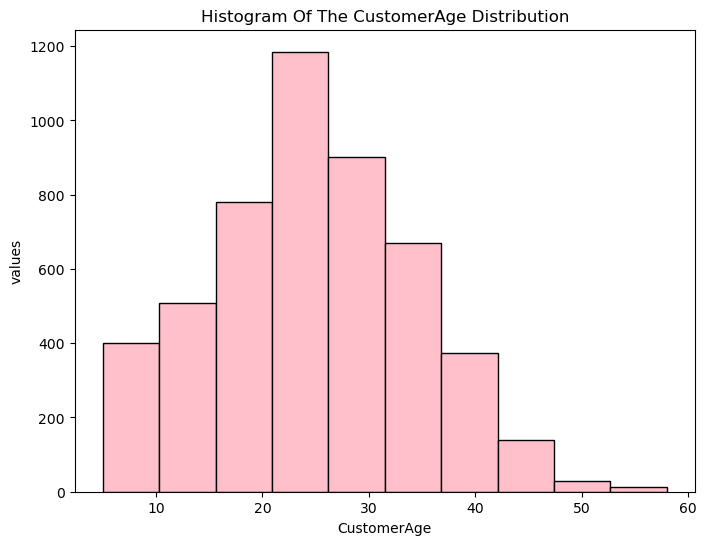

In [44]:
#16.Create a histogram of the CustomerAge distribution.
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(renamed_df["CustomerAge"],bins=10,edgecolor="black",color="pink")
plt.title("Histogram Of The CustomerAge Distribution")
plt.xlabel("CustomerAge")
plt.ylabel("values")
plt.show()

C:\Users\tharu\AppData\Local\Temp\ipykernel_22872\2522151860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PaymentMethod",data=renamed_df,palette=["red","green","skyblue"])


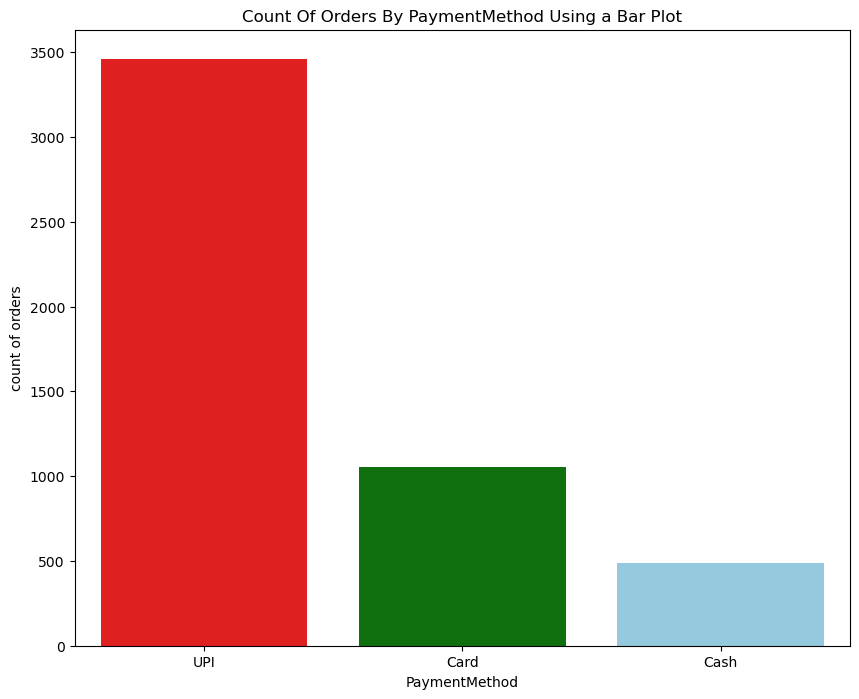

In [47]:
#17.Visualize the count of orders by PaymentMethod using a bar plot.
plt.figure(figsize=(10,8))
sns.countplot(x="PaymentMethod",data=renamed_df,palette=["red","green","skyblue"])
plt.title("Count Of Orders By PaymentMethod Using a Bar Plot")
plt.xlabel("PaymentMethod")
plt.ylabel("count of orders")
plt.show()

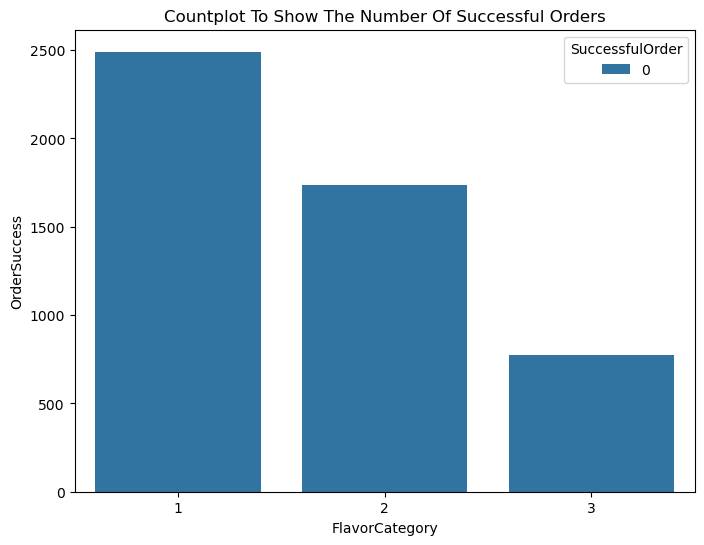

In [49]:
#18.Create a countplot to show the number of successful orders (OrderSuccess) for each FlavorCategory.
plt.figure(figsize=(8,6))
sns.countplot(x="FlavorCategory",hue="SuccessfulOrder",data=df)
plt.title("Countplot To Show The Number Of Successful Orders")
plt.xlabel("FlavorCategory")
plt.ylabel("OrderSuccess")
plt.show()

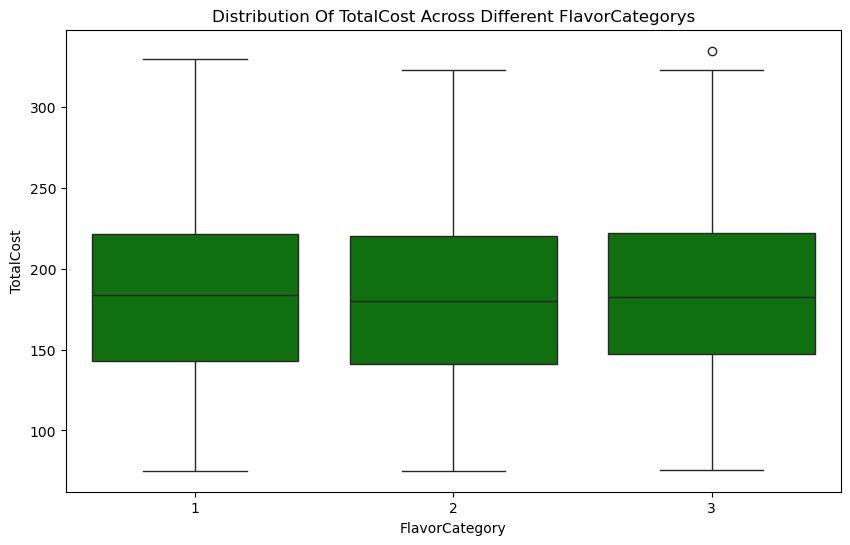

In [51]:
#19.Create a box plot to show the distribution of TotalCost across different FlavorCategorys.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='FlavorCategory', y='TotalCost',data=renamed_df,color="green")
plt.title("Distribution Of TotalCost Across Different FlavorCategorys")
plt.xlabel("FlavorCategory")
plt.ylabel("TotalCost")
plt.show()

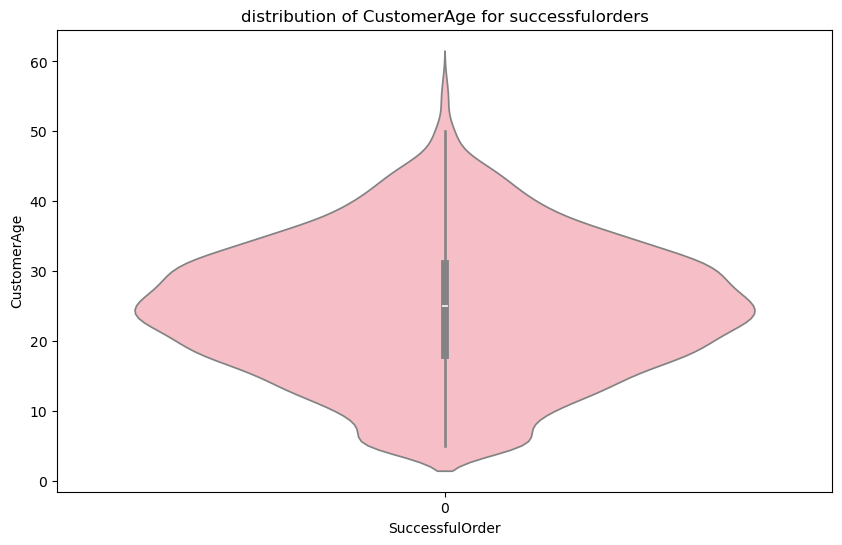

In [53]:
#20.Create a violin plot to show the distribution of CustomerAge for successful versus unsuccessful orders.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x='SuccessfulOrder',y='CustomerAge',data=df,color="lightpink")
plt.title("distribution of CustomerAge for successfulorders")
plt.xlabel("SuccessfulOrder")
plt.ylabel("CustomerAge")
plt.show()

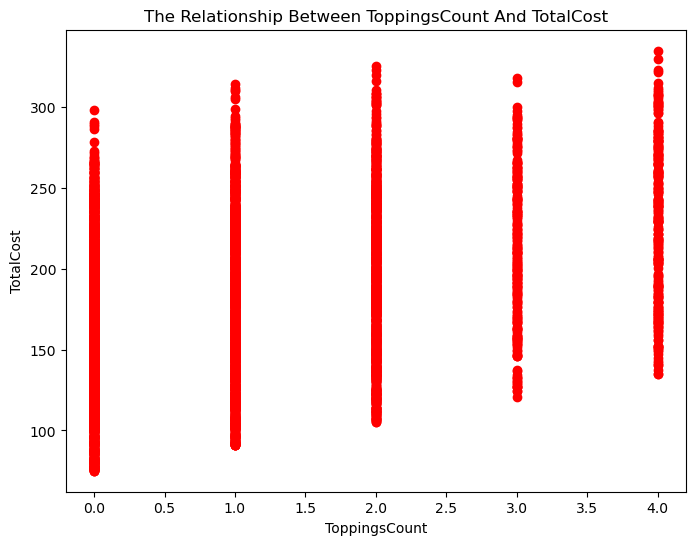

In [40]:
#21.Generate a scatter plot showing the relationship between ToppingsCount and TotalCost.
#Create a histogram of the CustomerAge distribution.
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(renamed_df["ToppingsCount"],renamed_df["TotalCost"],color="red")
plt.title("The Relationship Between ToppingsCount And TotalCost")
plt.xlabel("ToppingsCount")
plt.ylabel("TotalCost")
plt.show()

C:\Users\tharu\AppData\Local\Temp\ipykernel_22872\376033947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(avg_totalcost,palette=["green","red","yellow"])


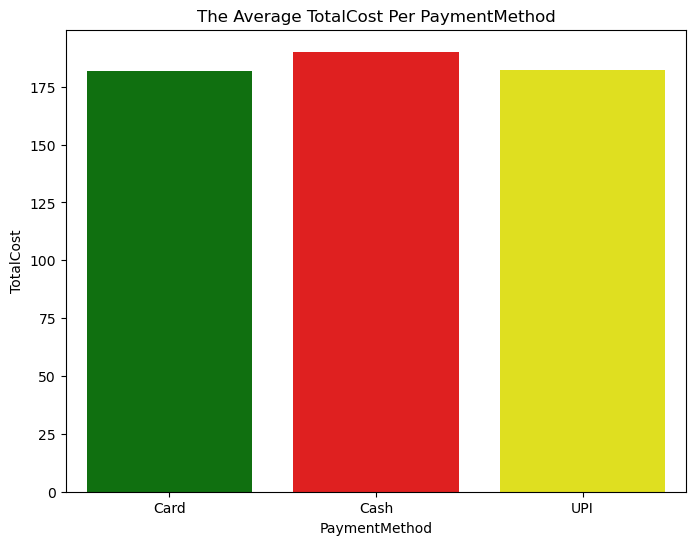

In [41]:
#22.Create a bar chart showing the average TotalCost per PaymentMethod.
#Step: Group the data by PaymentMethod, calculate the mean TotalCost, and then use sns.barplot()
avg_totalcost=renamed_df.groupby("PaymentMethod")["TotalCost"].mean()
plt.figure(figsize=(8,6))
sns.barplot(avg_totalcost,palette=["green","red","yellow"])
plt.title("The Average TotalCost Per PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("TotalCost")
plt.show()

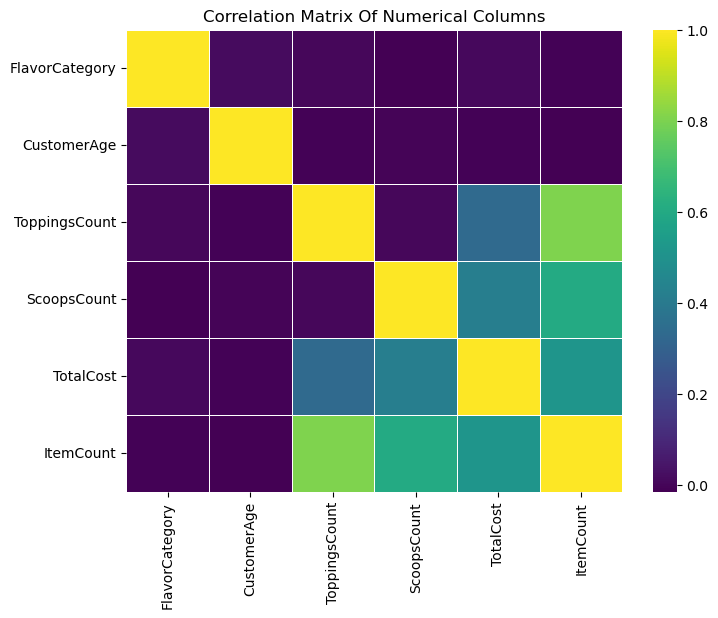

In [39]:
#23.Visualize the correlation matrix of the numerical columns using a heatmap.
numerical_columns=["FlavorCategory","CustomerAge","ToppingsCount","ScoopsCount","TotalCost","ItemCount"]
correlation_matrix=renamed_df[numerical_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,cmap="viridis",linewidth=(0.5))
plt.title("Correlation Matrix Of Numerical Columns")
plt.show()

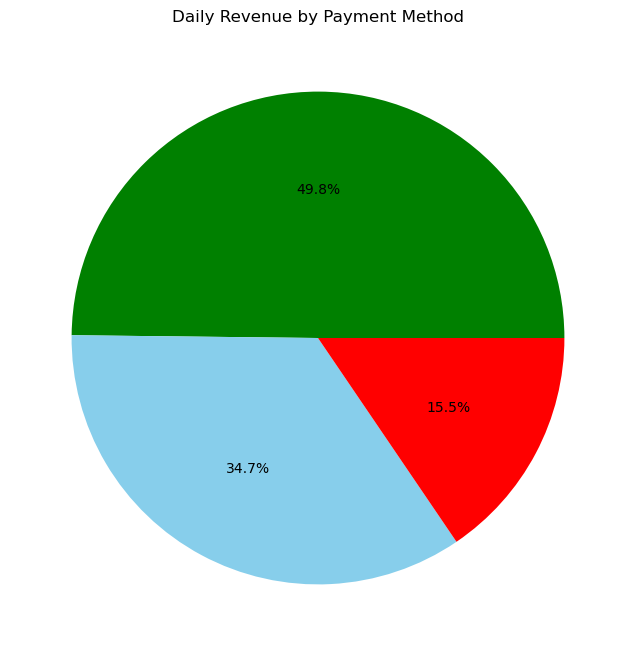

In [42]:
#24.Create a pie chart to show the proportion of each FlavorCategory.
import matplotlib.pyplot as plt
flavor_category=renamed_df["FlavorCategory"].value_counts()
colors = ['green', 'skyblue', 'red']
explode = [0, 0, 0]                 
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(flavor_category,autopct='%1.1f%%', explode=explode, colors=colors)
ax.set_title("Daily Revenue by Payment Method")
plt.show()

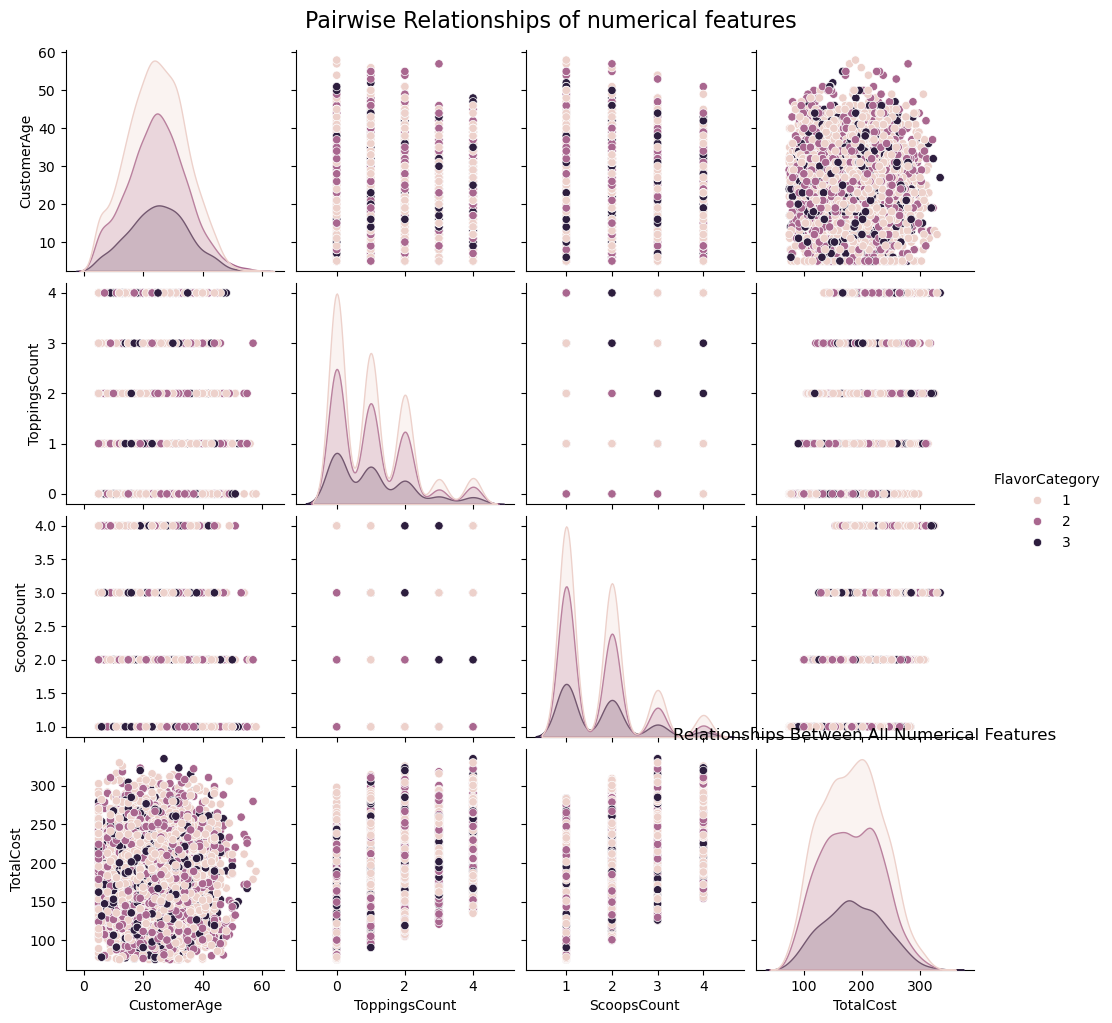

In [43]:
#25.Use a pair plot to visualize the relationships between all numerical features.
sns.pairplot(renamed_df, hue='FlavorCategory', vars=['CustomerAge','ToppingsCount','ScoopsCount','TotalCost'])
plt.suptitle('Pairwise Relationships of numerical features', y=1.02, fontsize=16)
plt.title("Relationships Between All Numerical Features")
plt.show()